<a href="https://colab.research.google.com/github/Fatemekm98/Image-Proccessing/blob/main/wavelet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:348: UserWarning: image is size 3 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  return func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


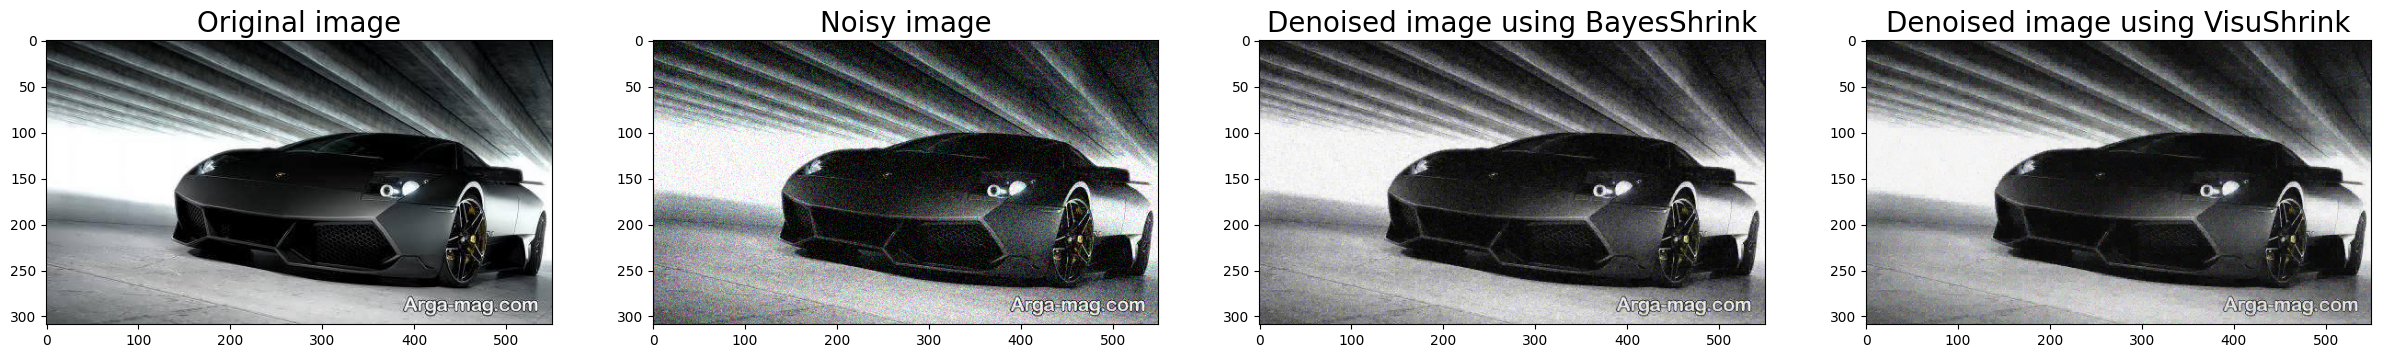

In [ ]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io

img = skimage.io.imread('/content/Car-profile-picture-57.jpg')  #read image
img = skimage.img_as_float(img)    #converting image as float

sigma = 0.1   #noise std
imgn = random_noise(img, var= sigma**2)

sigma_est = estimate_sigma(imgn, average_sigmas=True)


#denoising
img_bayes = denoise_wavelet(imgn, method='BayesShrink', mode='soft', wavelet_levels= 4, wavelet='haar',
                           rescale_sigma=True)


img_vis = denoise_wavelet(imgn, method='VisuShrink', mode='soft', sigma=sigma_est/3, wavelet_levels= 5, wavelet='haar',
                           rescale_sigma=True)


#PSNR
psnr_noisy = peak_signal_noise_ratio(img, imgn)
psnr_bayes = peak_signal_noise_ratio(img, img_bayes)
psnr_vis = peak_signal_noise_ratio(img, img_vis)

#plotting images
plt.figure(figsize=(30,100))

plt.subplot(1,4,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image', fontsize= 20)

plt.subplot(1,4,2)
plt.imshow(imgn, cmap=plt.cm.gray)
plt.title('Noisy image', fontsize= 20)

plt.subplot(1,4,3)
plt.imshow(img_bayes, cmap=plt.cm.gray)
plt.title('Denoised image using BayesShrink', fontsize= 20)

plt.subplot(1,4,4)
plt.imshow(img_vis, cmap=plt.cm.gray)
plt.title('Denoised image using VisuShrink', fontsize= 20)

plt.show()



In [ ]:
#print
print('PSNR[Original Vs. Noisy Image]:', psnr_noisy)
print('PSNR[Original Vs. Denoised(BayesShrink)]:', psnr_bayes)
print('PSNR[Original Vs. Denoised(VisuShrink)]:', psnr_vis)

PSNR[Original Vs. Noisy Image]: 20.807877176672427
PSNR[Original Vs. Denoised(BayesShrink)]: 25.74539023580705
PSNR[Original Vs. Denoised(VisuShrink)]: 25.822795800912743


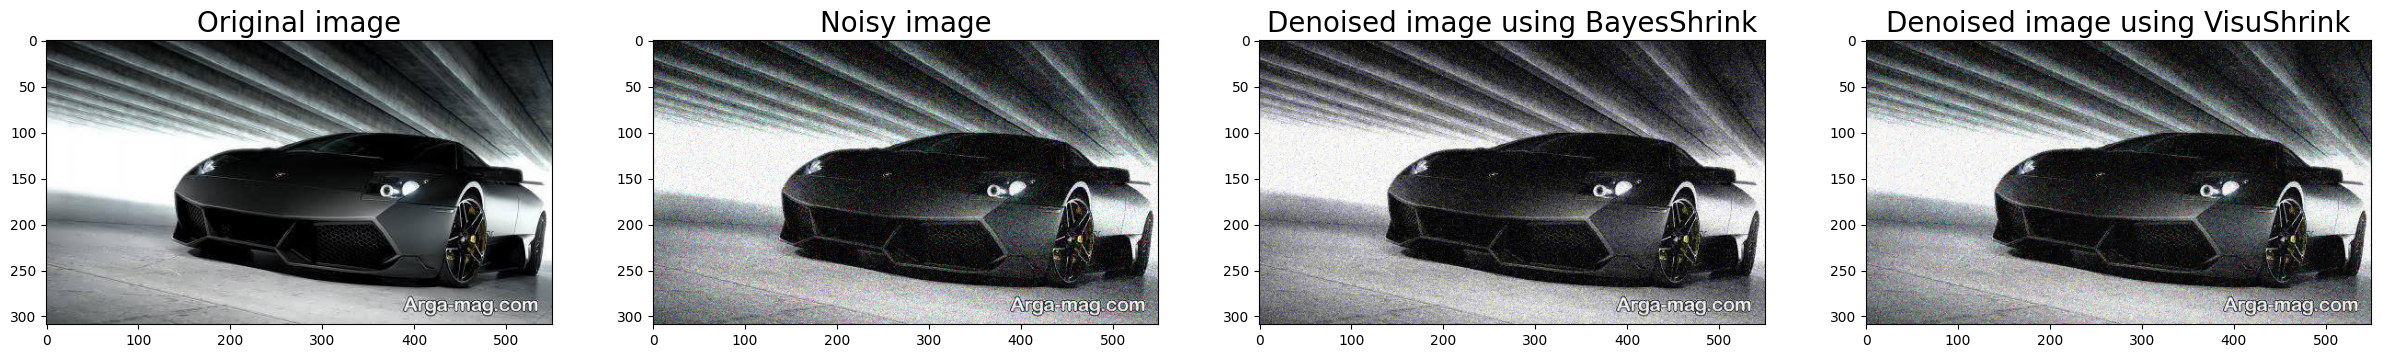

In [ ]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io

img = skimage.io.imread('/content/Car-profile-picture-57.jpg')  #read image
img = skimage.img_as_float(img)    #converting image as float

sigma = 0.1   #noise std
imgn = random_noise(img, var= sigma**2)

sigma_est = estimate_sigma(imgn, average_sigmas=True)


#denoising
img_bayes = denoise_wavelet(imgn, method='BayesShrink', mode='hard', wavelet_levels= 3, wavelet='haar',
                           rescale_sigma=True)


img_vis = denoise_wavelet(imgn, method='VisuShrink', mode='hard', sigma=sigma_est/3, wavelet_levels= 5, wavelet='haar',
                           rescale_sigma=True)


#PSNR
psnr_noisy = peak_signal_noise_ratio(img, imgn)
psnr_bayes = peak_signal_noise_ratio(img, img_bayes)
psnr_vis = peak_signal_noise_ratio(img, img_vis)

#plotting images
plt.figure(figsize=(30,100))

plt.subplot(1,4,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image', fontsize= 20)

plt.subplot(1,4,2)
plt.imshow(imgn, cmap=plt.cm.gray)
plt.title('Noisy image', fontsize= 20)

plt.subplot(1,4,3)
plt.imshow(img_bayes, cmap=plt.cm.gray)
plt.title('Denoised image using BayesShrink', fontsize= 20)

plt.subplot(1,4,4)
plt.imshow(img_vis, cmap=plt.cm.gray)
plt.title('Denoised image using VisuShrink', fontsize= 20)

plt.show()



In [ ]:
#print
print('PSNR[Original Vs. Noisy Image]:', psnr_noisy)
print('PSNR[Original Vs. Denoised(BayesShrink)]:', psnr_bayes)
print('PSNR[Original Vs. Denoised(VisuShrink)]:', psnr_vis)

PSNR[Original Vs. Noisy Image]: 20.81842607210708
PSNR[Original Vs. Denoised(BayesShrink)]: 22.735478593800607
PSNR[Original Vs. Denoised(VisuShrink)]: 21.610667856041665
